In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/kaggle/input/aps-failure/aps_failure_set.csv")
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
df.shape

(60000, 171)

In [6]:
df.replace("na", np.nan, inplace=True)

In [7]:
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In [8]:
# Calculate the sum of null values for each column
null_counts = df.isnull().sum()

# Sort the null counts in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Display the sum of null values for each column in descending order
print("Sum of null values in each column (descending order):")
for col, count in sorted_null_counts.items():
    print(f"{col}: {count} null values")

Sum of null values in each column (descending order):
br_000: 49264 null values
bq_000: 48722 null values
bp_000: 47740 null values
bo_000: 46333 null values
cr_000: 46329 null values
ab_000: 46329 null values
bn_000: 44009 null values
bm_000: 39549 null values
bl_000: 27277 null values
bk_000: 23034 null values
cf_000: 14861 null values
co_000: 14861 null values
ch_000: 14861 null values
ad_000: 14861 null values
cg_000: 14861 null values
db_000: 13808 null values
dc_000: 13808 null values
cx_000: 13808 null values
da_000: 13808 null values
cz_000: 13808 null values
cv_000: 13808 null values
cu_000: 13808 null values
ct_000: 13808 null values
cy_000: 13808 null values
ec_00: 10239 null values
cm_000: 9877 null values
cl_000: 9553 null values
ed_000: 9553 null values
ak_000: 4400 null values
ca_000: 4356 null values
dm_000: 4009 null values
dg_000: 4008 null values
df_000: 4008 null values
dh_000: 4008 null values
dl_000: 4008 null values
dj_000: 4007 null values
eb_000: 4007 null valu

In [9]:
# Calculate null percentages
null_percentages = df.isna().sum() / len(df) * 100

# Sort and print in descending order
null_percentages = null_percentages.sort_values(ascending=False)
print(null_percentages)

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
cr_000    77.215000
            ...    
ci_000     0.563333
ck_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64


In [10]:
# List of columns to drop
columns_to_drop = ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'bm_000']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
total_nulls = df.isnull().sum().sum()
print("Total number of null values in the DataFrame:", total_nulls)

Total number of null values in the DataFrame: 481740


In [12]:
df['class'] = df['class'].replace({'neg': 0, 'pos': 1})

/tmp/ipykernel_30/2765361577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'neg': 0, 'pos': 1})


In [13]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [14]:
df = df.astype(float)

In [15]:
df.fillna(df.mean(), inplace=True)

In [16]:
total_nulls = df.isnull().sum().sum()
print("Total number of null values in the DataFrame:", total_nulls)

Total number of null values in the DataFrame: 0


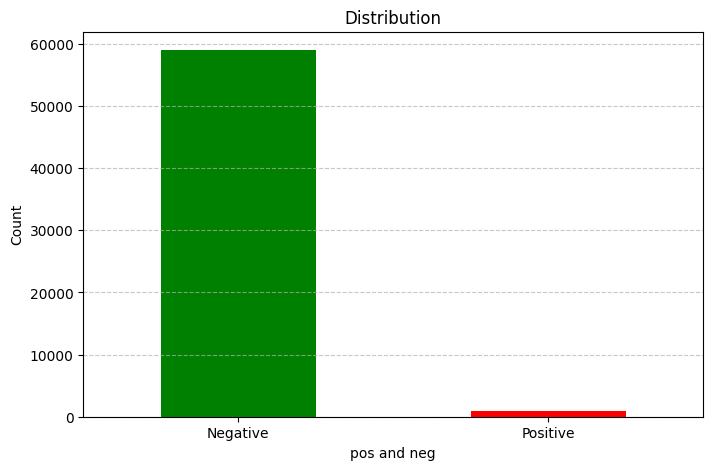

In [17]:
import matplotlib.pyplot as plt

pass_fail_counts = df['class'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 5))
pass_fail_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution')
plt.xlabel('pos and neg')
plt.ylabel('Count')
plt.xticks(ticks=range(len(pass_fail_counts)), labels=['Negative', 'Positive'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from tensorflow.keras import layers, models

In [19]:
X = df.drop(columns=['class'])
y = df['class']


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [21]:
# Split the resampled data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test_smote)


In [23]:
print("After SMOTE:")
print(f"Training set shape: {X_train_smote_scaled.shape}")
print(f"Testing set shape: {X_test_smote_scaled.shape}")

After SMOTE:
Training set shape: (94400, 162)
Testing set shape: (23600, 162)


In [24]:
# Check the count of labels in y_train
label_counts = y_train_smote.value_counts()
print("Label counts in y_train:\n", label_counts)

Label counts in y_train:
 class
1.0    47352
0.0    47048
Name: count, dtype: int64


In [44]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(94400, 162)
(94390,)


In [26]:
!pip install cuml-cu11 -f https://rapidsai.github.io/conda-packages/rapidsai


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Looking in links: https://rapidsai.github.io/conda-packages/rapidsai
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.t

# SVM Model

In [27]:
from cuml.svm import SVC as cuSVC

svm_model_gpu = cuSVC(kernel='linear')
svm_model_gpu.fit(X_train_smote_scaled, y_train_smote)

y_pred_svm_gpu = svm_model_gpu.predict(X_test_smote_scaled)
print("SVM Classification Report (GPU):\n", classification_report(y_test_smote, y_pred_svm_gpu))


[W] [06:35:32.563169] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
SVM Classification Report (GPU):
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     11952
         1.0       0.98      0.96      0.97     11648

    accuracy                           0.97     23600
   macro avg       0.97      0.97      0.97     23600
weighted avg       0.97      0.97      0.97     23600



# KNN model

In [28]:
from cuml.neighbors import KNeighborsClassifier as cuKNN

# Train KNN model
knn_model_gpu = cuKNN(n_neighbors=5)
knn_model_gpu.fit(X_train_smote_scaled, y_train_smote)

# Make predictions
y_pred_knn_gpu = knn_model_gpu.predict(X_test_smote_scaled)

# Print metrics
print("KNN Classification Report (GPU):\n", classification_report(y_test_smote, y_pred_knn_gpu))


KNN Classification Report (GPU):
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11952
         1.0       0.98      1.00      0.99     11648

    accuracy                           0.99     23600
   macro avg       0.99      0.99      0.99     23600
weighted avg       0.99      0.99      0.99     23600



# DTC Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Train DTC model
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_smote_scaled, y_train_smote)

# Make predictions
y_pred_dtc = dtc_model.predict(X_test_smote_scaled)

# Print metrics
print("DTC Classification Report:\n", classification_report(y_test_smote, y_pred_dtc))


DTC Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11952
         1.0       0.99      0.99      0.99     11648

    accuracy                           0.99     23600
   macro avg       0.99      0.99      0.99     23600
weighted avg       0.99      0.99      0.99     23600



# CNN MOdel

In [30]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Reshape data for CNN
X_train_cnn = X_train_smote_scaled.reshape(-1, X_train_smote_scaled.shape[1], 1)
X_test_cnn = X_test_smote_scaled.reshape(-1, X_test_smote_scaled.shape[1], 1)

# Define CNN model
cnn_model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_cnn, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate CNN model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_smote)
print(f'CNN Test Accuracy: {test_accuracy * 100:.2f}%')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1732343873.691610     186 service.cc:145] XLA service 0x7e3610005a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732343873.691663     186 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732343873.691669     186 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  95/2360 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8895 - loss: 0.3324

I0000 00:00:1732343875.703537     186 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2360/2360 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9537 - loss: 0.1486 - val_accuracy: 0.9745 - val_loss: 0.0824
Epoch 2/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9770 - loss: 0.0730 - val_accuracy: 0.9819 - val_loss: 0.0633
Epoch 3/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9842 - loss: 0.0507 - val_accuracy: 0.9852 - val_loss: 0.0501
Epoch 4/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0403 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 5/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9914 - val_loss: 0.0332
Epoch 6/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9940 - val_loss: 0.0238
Epoch 7/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9942 - val_loss: 0.0246
Epoch 8/10
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9950 - loss: 0.0142 - val_accurac

In [61]:
# Set the time steps for LSTM
time_steps = 10
n_features = X_train_smote_scaled.shape[1] // time_steps


In [62]:
n_features

16

In [49]:
# Reshape training data to have time_steps and matching number of samples
usable_samples_train = (X_train_smote_scaled.shape[0] // time_steps) * time_steps
usable_samples_train

94390

In [52]:
X_train_smote_scaled = X_train_smote_scaled[:usable_samples_train]
X_train_smote_scaled.shape

(94390, 162)

In [54]:
y_train_smote = y_train_smote[:usable_samples_train]
y_train_smote.shape

(94390,)

In [83]:
X_train_smote.shape

(94400, 162)

In [92]:
# New value for time steps
time_steps = 10  # Change this to the desired value

# Reshape data for LSTM (adjusting time steps accordingly)
X_train_lstm = X_train_smote.values.reshape(-1, time_steps, X_train_smote.shape[1] // time_steps)
X_test_lstm = X_test_smote.values.reshape(-1, time_steps, X_test_smote.shape[1] // time_steps)

In [93]:
X_train_lstm.shape

(95580, 10, 16)

In [94]:
y_train_smote.shape

(94390,)

In [95]:
# Truncate the input data to match the number of labels
X_train_lstm = X_train_lstm[:len(y_train_smote)]
print(f'New X_train_lstm shape: {X_train_lstm.shape}')

New X_train_lstm shape: (94390, 10, 16)


In [99]:
X_test_lstm.shape

(23895, 10, 16)

In [100]:
# Truncate the input data to match the number of labels
X_test_lstm = X_test_lstm[:len(y_test_smote)]
print(f'New X_test_lstm shape: {X_test_lstm.shape}')

New X_test_lstm shape: (23600, 10, 16)


#  LSTM model

In [101]:
# Define LSTM model
lstm_model = models.Sequential([
    layers.LSTM(50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train_smote, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate LSTM model
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test_smote)
print(f'LSTM Test Accuracy: {test_accuracy * 100:.2f}%')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5026 - loss: 0.7209 - val_accuracy: 0.5006 - val_loss: 0.6936
Epoch 2/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.4962 - val_loss: 0.6938
Epoch 3/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4995 - loss: 0.6938 - val_accuracy: 0.5063 - val_loss: 0.6932
Epoch 4/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5019 - loss: 0.6936 - val_accuracy: 0.4958 - val_loss: 0.6941
Epoch 5/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5026 - loss: 0.6939 - val_accuracy: 0.4984 - val_loss: 0.6934
Epoch 6/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5020 - loss: 0.6936 - val_accuracy: 0.5024 - val_loss: 0.6933
Epoch 7/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5025 - loss: 0.6937 - val_accuracy: 0.4949 - val_loss: 0.6934
Epoch 8/15
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4996 - loss: 0

# GANs

In [102]:
X = df.drop(columns=['class'])
y = df['class']

In [114]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Filter minority class data
X_minority = X_scaled[y == 1]

In [115]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator Model
def build_generator(latent_dim, output_dim):
    return tf.keras.Sequential([
        layers.Dense(64, activation="relu", input_dim=latent_dim),
        layers.Dense(128, activation="relu"),
        layers.Dense(output_dim, activation="tanh")
    ])


# Discriminator Model
def build_discriminator(input_dim):
    return tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_dim=input_dim),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
latent_dim = 32  # Dimension of the latent space
output_dim = X_minority.shape[1]

# Instantiate models
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)

# Compile the discriminator
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Combine generator and discriminator into GAN
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
def train_gan(generator, discriminator, gan, data, latent_dim, epochs=1000, batch_size=32):
    half_batch = batch_size // 2

    for epoch in range(1, epochs + 1):  # Start epoch count from 1
        # Generate fake samples
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_samples = generator.predict(noise)
        
        # Select real samples
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_samples = data[idx]
        
        # Labels for training
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))
        
        # Train discriminator on real and fake samples
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Combine real and fake loss
        
        # Train generator via GAN
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # Generator wants discriminator to believe it's real
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Debug output for type checking
        if epoch == 1:  # Print once to verify structures
            print(f"DEBUG: d_loss_real: {d_loss_real}, d_loss_fake: {d_loss_fake}, d_loss: {d_loss}, g_loss: {g_loss}")
        
        # Extract scalar values safely
        d_loss_value = float(d_loss[0]) if isinstance(d_loss, (list, np.ndarray)) else float(d_loss)
        d_accuracy = float(d_loss[1]) if isinstance(d_loss, (list, np.ndarray)) and len(d_loss) > 1 else 0.0
        
        # For g_loss, if it's a list or array, access the first element (which should be the actual loss)
        g_loss_value = float(g_loss[0]) if isinstance(g_loss, (list, np.ndarray)) else float(g_loss)
        
        # Log progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss_value:.4f}, D Accuracy: {d_accuracy:.2f}%, G Loss: {g_loss_value:.4f}")

# Train the GAN
train_gan(generator, discriminator, gan, X_minority, latent_dim, epochs=1000, batch_size=32)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
DEBUG: d_loss_real: [array(2.9131646, dtype=float32), array(0.21200372, dtype=float32)], d_loss_fake: [array(2.9215415, dtype=float32), array(0.21147896, dtype=float32)], d_loss: [2.9173532  0.21174134], g_loss: [array(2.9215415, dtype=float32), array(2.9215415, dtype=float32), array(0.21147896, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1

# Generated Data

In [121]:
# Generate synthetic minority class samples
num_synthetic_samples = 500
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
synthetic_samples = generator.predict(noise)

# Inverse transform to original scale
synthetic_samples = scaler.inverse_transform(synthetic_samples)

# Add synthetic samples to the dataset
X_gan_augmented = np.vstack([X, synthetic_samples])
y_gan_augmented = np.hstack([y, np.ones(num_synthetic_samples)])


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [122]:
# Create a DataFrame from the augmented data
augmented_data = pd.DataFrame(X_gan_augmented)  # Features
augmented_data['Label'] = y_gan_augmented  # Add labels as the last column

# Save to CSV
augmented_data.to_csv('augmented_data.csv', index=False)

print("Augmented dataset saved to 'augmented_data.csv'.")

Augmented dataset saved to 'augmented_data.csv'.


In [123]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers, models

In [124]:
# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gan_augmented, y_gan_augmented, test_size=0.2, random_state=42)

# Step 2: Standardize the data (for most models, this is necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Support Vector Machine (SVM) 


In [125]:
svm = SVC(kernel='linear')  # Linear kernel for simplicity
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9925
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11796
         1.0       0.91      0.78      0.84       304

    accuracy                           0.99     12100
   macro avg       0.95      0.89      0.92     12100
weighted avg       0.99      0.99      0.99     12100



#  2. K-Nearest Neighbors (KNN) 


In [126]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc:.4f}")
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9891
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11796
         1.0       0.87      0.67      0.75       304

    accuracy                           0.99     12100
   macro avg       0.93      0.83      0.87     12100
weighted avg       0.99      0.99      0.99     12100



# 3. Decision Tree Classifier (DTC)


In [127]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Accuracy: {dtc_acc:.4f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtc))

Decision Tree Accuracy: 0.9889
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11796
         1.0       0.77      0.81      0.79       304

    accuracy                           0.99     12100
   macro avg       0.88      0.90      0.89     12100
weighted avg       0.99      0.99      0.99     12100



# 4. Convolutional Neural Network (CNN) 


In [130]:
# Reshaping data to treat each sample as a 1D signal (if you want to continue with CNN)
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)  # Treat each feature as a "channel"
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

cnn_model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),  # 1D convolution
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
y_pred_cnn = cnn_model.predict(X_test_cnn) > 0.5  # Convert to binary predictions
print(f"CNN Accuracy: {cnn_acc:.4f}")
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1513/1513 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9411 - loss: 187023.5469 - val_accuracy: 0.9788 - val_loss: 1981.2092
Epoch 2/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9738 - loss: 1022.7842 - val_accuracy: 0.9831 - val_loss: 0.8940
Epoch 3/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.4123 - val_accuracy: 0.9829 - val_loss: 1.5393
Epoch 4/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 1.4734 - val_accuracy: 0.9830 - val_loss: 0.4902
Epoch 5/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9832 - loss: 0.2208 - val_accuracy: 0.9831 - val_loss: 0.8921
Epoch 6/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9832 - loss: 0.1797 - val_accuracy: 0.9831 - val_loss: 1.2354
Epoch 7/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0934 - val_accuracy: 0.9830 - val_loss: 0.7873
Epoch 8/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9830 - loss: 1064.7083

#  5. Long Short-Term Memory (LSTM) 


In [132]:
# Reshaping data for LSTM (assuming sequence-like data)
X_train_lstm = X_train.reshape(-1, 1, X_train.shape[1])  # Adjust to match the sequence data
X_test_lstm = X_test.reshape(-1, 1, X_test.shape[1])

lstm_model = models.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
y_pred_lstm = lstm_model.predict(X_test_lstm) > 0.5  # Convert to binary predictions
print(f"LSTM Accuracy: {lstm_acc:.4f}")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1513/1513 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9588 - loss: 323285.4688 - val_accuracy: 0.9546 - val_loss: 8254.9102
Epoch 2/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9667 - loss: 9410.9473 - val_accuracy: 0.9825 - val_loss: 13635.5039
Epoch 3/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9739 - loss: 5927.3262 - val_accuracy: 0.9818 - val_loss: 3196.8564
Epoch 4/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 3027.5339 - val_accuracy: 0.9827 - val_loss: 362.2759
Epoch 5/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9837 - loss: 1089.6156 - val_accuracy: 0.9827 - val_loss: 813.5710
Epoch 6/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9843 - loss: 563.1604 - val_accuracy: 0.9826 - val_loss: 10.6707
Epoch 7/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9827 - loss: 84.4172 - val_accuracy: 0.9824 - val_loss: 5116.3232
Epoch 8/10
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accurac